<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/Simple_Linear(Assignment)_Anisha_Mohan_(batch_30th_december).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION.1
 Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
a=pd.read_csv('/content/delivery_time.csv')
a

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
b=a.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})
b

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
b.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


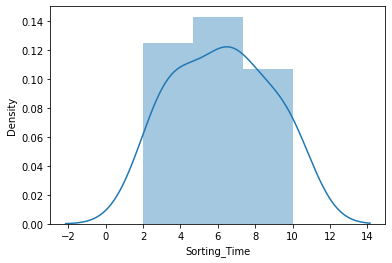

In [5]:
sns.distplot(b['Sorting_Time'])

In [6]:
model = smf.ols("Delivery_Time~Sorting_Time",data=b).fit()

In [7]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [8]:
model.tvalues, model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64, Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

p < 0.05 ; So we can proceed with predicting Delivery Time using Sorting Time.

Manual Check :

Let Sorting Time = 5 ;

Therefore, Delivery Time = 6.58 + 1.65 * Sorting Time

Delivery Time = 6.58 + 8.25 = 14.83

In [9]:
testdata=pd.Series([5])
data_pred=pd.DataFrame(testdata,columns=['Sorting_Time'])

In [10]:
model.predict(data_pred)

0    14.827833
dtype: float64

In [11]:
model.rsquared,model.aic

(0.6822714748417231, 106.71400170798609)

R^2 value < 0.75 is not a good Fit Line, so we will validate model and rerun our model.

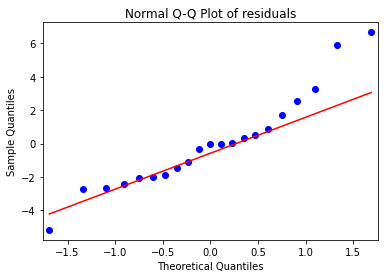

In [12]:
qqplot = sm.qqplot(model.resid, line ='q')
plt.title("Normal Q-Q Plot of residuals")
plt.show()

In [13]:
list(np.where(model.resid>2))

[array([ 2,  3,  4, 20])]

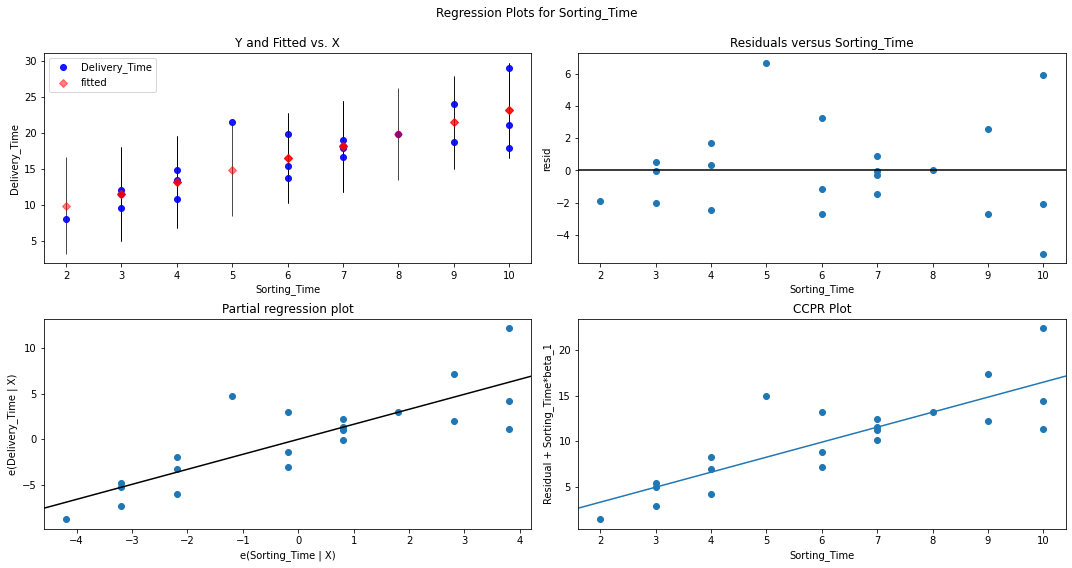

In [14]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,"Sorting_Time",fig=fig)
plt.show()

In [15]:
model_influence = model.get_influence()
(c,x) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


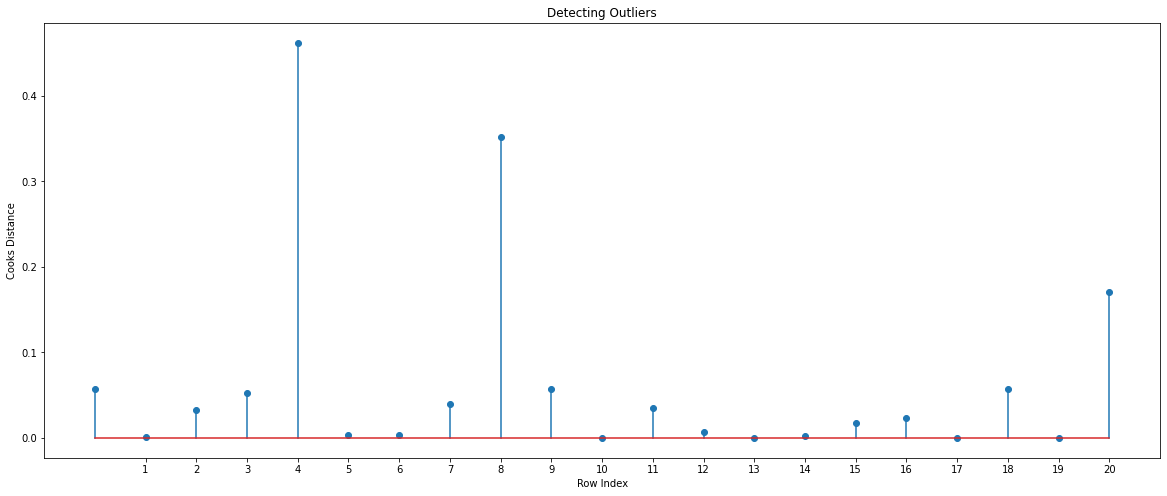

In [16]:
fig = plt.subplots(figsize = (20,8))
plt.stem(np.arange(len(a)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.title('Detecting Outliers')
plt.xticks((range(1, 21)))
plt.show()

In [17]:
np.argmax(c),np.max(c)

(4, 0.462053041265031)

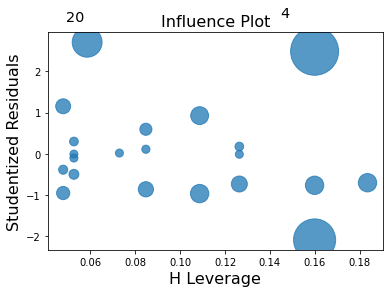

In [18]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [19]:
k = a.shape[1]
n = a.shape[0]
leverage_cutoff = 3 * ((k+1)/n)
k,n,leverage_cutoff

(2, 21, 0.42857142857142855)

In [20]:
a[a.index.isin([4,8,9,20])]

,Delivery Time,Sorting Time
4,29.00,10
8,17.90,10
9,18.75,9
20,21.50,5


In [21]:
a_new = pd.read_csv('/content/delivery_time.csv')
b_new = a_new.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})
a1 = b_new.drop(a_new.index[[4,8,20]],axis=0).reset_index()
a1 = a1.drop(['index'],axis=1)
a1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,18.75,9
8,19.83,8
9,10.75,4


In [22]:
final_model = smf.ols("Delivery_Time~Sorting_Time",data=a1).fit()
final_model.rsquared, final_model.aic

(0.8332330202945817, 74.89939393823053)

As rsquared > 0.75, This model can be used for prediction now.



In [23]:
testdata=pd.Series([5,6,7,8,9])
final_data_pred=pd.DataFrame(testdata,columns=['Sorting_Time'])
final_model.predict(final_data_pred)

0    14.394381
1    16.068457
2    17.742533
3    19.416609
4    21.090685
dtype: float64

In [24]:
final_model.rsquared

0.8332330202945817

Question.2 Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [25]:
data = pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


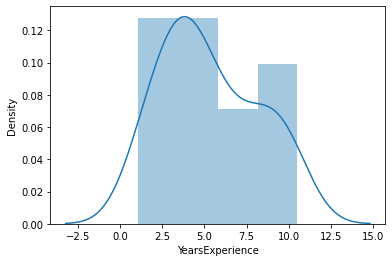

In [27]:
sns.distplot(data['YearsExperience'])

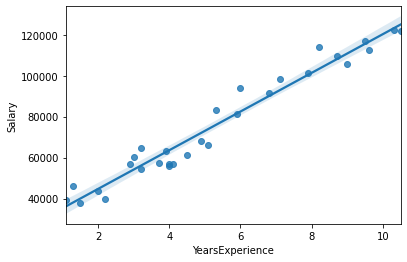

In [28]:
model = smf.ols("Salary~YearsExperience",data=data).fit()
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [29]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [30]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

p-value < 0.05, so we can proceed and predict with our assumption.



Manual Check : Let's check for YearsExpereince = 5 Yrs. Salary = B0 + B1 YearsExperience Salary = 25792.20 + 9449.96 * 5

= 73041.99 Rs/- = 73042 Rs/-

In [31]:
data_new = pd.Series([5])
data_prediction = pd.DataFrame(data_new,columns = ['YearsExperience'])
model.predict(data_prediction)

0    73042.011806
dtype: float64

In [32]:
model.rsquared

0.9569566641435086